#  Predicting Customer Churn in the Telecommunications Industry
#  A Data-Driven Approach to Improve Customer Retention

# Project Overview:
This project aims to develop a classification model that will predict customer churn for SyriaTel, a telecommunications company. I have chosen to follow the CRISP-DM method to complete this project. It will involve six stages: Business Understanding, Data Understanding, Data Preparation, Modeling, Evaluation, and Deployment. The project purposes to provide insights into the patterns and factors influencing customer churn, and also develop a predictive model to assist in reducing customer attrition.

# Business Understanding:

SyriaTel is the major stakeholder for this project. They are interested in reducing customer churn. By helping them predict customer churn, they can take proactive measures to ensure maximum customer retentions and profit maximization. The project majorly focuses on identifying patterns that facilitate to customer churn and providing recommendations on how to mitigate this.

# 1.Problem Definition
Objective: Develop a predictive model to determine whether a customer will churn (binary classification: Yes/No) based on customer usage patterns, interaction with the company, and plan features.

Outcome: Provide actionable insights to SyriaTel to reduce customer churn by identifying high-risk customers and enabling targeted retention strategies.

Metric for Success: Evaluate the model's performance using metrics such as:

Accuracy: Measures overall correctness but may not address class imbalance.
Precision: Useful when minimizing false positives (e.g., targeting non-churners for retention campaigns is costly).
Recall: Important to identify as many churners as possible (minimizing false negatives).
F1-Score: Balances Precision and Recall, suitable for imbalanced datasets.
AUC-ROC: Evaluates the tradeoff between true positive and false positive rates across thresholds.

# Data Understanding
Data understanding lets us explore and analyze our churn data to gain insights into its structure, content, and relationships. It involves looking at the types of data and what the columns entail, identifying patterns, checking for missing values, and understanding the distribution of variables. The goal is to familiarize ourselves with the data before any analysis or modeling, ensuring that we can make informed decisions and address any issues, such as imbalances or outliers, that might affect the results.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Read data from csv file & create dataframe. Checking the first 5 rows.
df_churn = pd.read_csv('SyriaTel.csv')
df_churn

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [2]:
df_churn.shape

(3333, 21)

In [3]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [4]:
df_churn.describe

<bound method NDFrame.describe of      state  account length  area code phone number international plan  \
0       KS             128        415     382-4657                 no   
1       OH             107        415     371-7191                 no   
2       NJ             137        415     358-1921                 no   
3       OH              84        408     375-9999                yes   
4       OK              75        415     330-6626                yes   
...    ...             ...        ...          ...                ...   
3328    AZ             192        415     414-4276                 no   
3329    WV              68        415     370-3271                 no   
3330    RI              28        510     328-8230                 no   
3331    CT             184        510     364-6381                yes   
3332    TN              74        415     400-4344                 no   

     voice mail plan  number vmail messages  total day minutes  \
0                yes   

# Categorical columns

In [5]:
categorical_columns = df_churn.select_dtypes(exclude='number')
categorical_columns.columns

Index(['state', 'phone number', 'international plan', 'voice mail plan',
       'churn'],
      dtype='object')

In [6]:
# Removing customer phone number feature as it is contact information to the client and adds no value to the analysis

df_churn.drop(['phone number','area code','state'],axis=1,inplace=True)
df_churn.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


# Numerical columns

In [7]:
numeric_columns = df_churn.select_dtypes(include='number')
numeric_columns.columns

Index(['account length', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls'],
      dtype='object')

# Data Preparation
-Identifying and removing duplicate rows.
-Handling missing/NAN values to ensure data consistency.
-Eliminating irrelevant columns that do not contribute meaningfully to the analysis.

In [8]:
# check for rows that have null/missing values
missing_values = df_churn[df_churn.isnull().any(axis=1)]
print(f'We have {len(missing_values)} values missing in our dataset')

We have 0 values missing in our dataset


In [9]:
#check for duplcates in our dataset
duplicated_values = df_churn[df_churn.duplicated()]
print(f"We have {len(duplicated_values)} duplicate values in our dataset.")

We have 0 duplicate values in our dataset.


# Summary Statistics for numeric variables

In [10]:
df_churn.describe()

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


# checking for relation against categorical columns

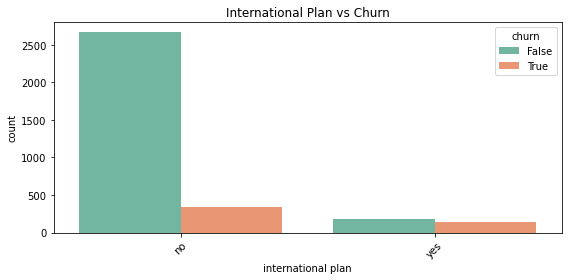

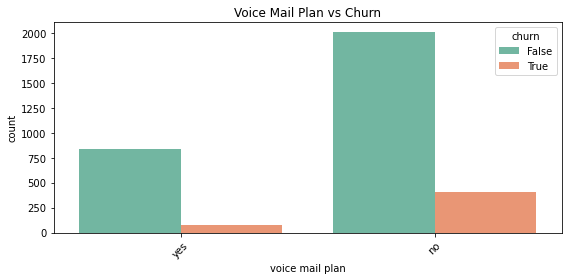

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

categorical_cols = ['international plan', 'voice mail plan']

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, hue='churn', data=df_churn, palette='Set2')
    plt.title(f'{col.title()} vs Churn')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


# checking for relation against numerical columns

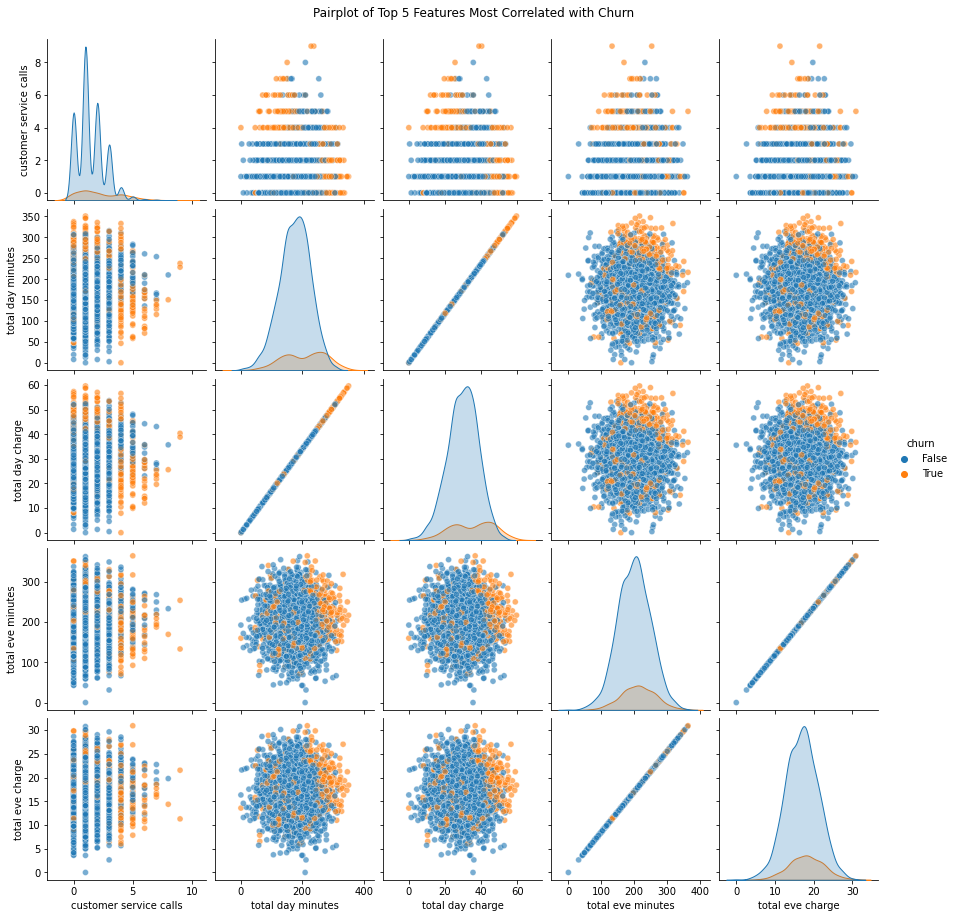

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Ensure churn is numeric if not already
if df_churn['churn'].dtype == 'object':
    df_churn['churn'] = df_churn['churn'].map({'No': 0, 'Yes': 1})

# Step 2: List of numeric columns (excluding 'churn' for correlation calc)
numeric_cols = [
    'account length',  'number vmail messages',
    'total day minutes', 'total day calls', 'total day charge',
    'total eve minutes', 'total eve calls', 'total eve charge',
    'total night minutes', 'total night calls', 'total night charge',
    'total intl minutes', 'total intl calls', 'total intl charge',
    'customer service calls'
]

# Step 3: Find top 5 features most correlated with churn
correlation = df_churn[numeric_cols + ['churn']].corr()['churn'].abs().sort_values(ascending=False)
top_features = correlation[1:6].index.tolist()  # skip 'churn' itself

# Step 4: Plot pairplot using top features
sns.pairplot(df_churn[top_features + ['churn']], hue='churn', diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('Pairplot of Top 5 Features Most Correlated with Churn', y=1.02)
plt.show()


# data understanding
The dataset has 3333 rows and 21 columns and has no null values or duplicates. Therefore we do not need to impute any missing values or drop any duplicated values in this case. Among the 21 columns five of them are categorical in nature; 'state', 'phone number', 'international plan', 'voice mail plan','churn'. Churn which is our target variable in the data set is of boolean data type. Thus, we will make it binary later when building our models.

Some of the columns based on domain knowledge are not actually good predictors and thus dropping them before fitiing into our models will be good. For example, the phone number variable has nothing to do with customer chruning the company.

Most values in the dataset are numerical in nature. The summary statistics provides a brief overview of the dataset and the range of values observed in each numerical column.

# Exploratory Data Analysis

Exploratory Data Analysis (EDA) on our dataset will involve examining the churn data to understand the underlying patterns, relationships, and characteristics of the features before building any predictive models. This includes analyzing the distribution of numerical variables (e.g., total day minutes, total night calls), understanding categorical features (e.g., international plan, voice mail plan), identifying potential outliers or anomalies, checking for missing data, and exploring correlations between features. EDA also involves visualizing the data using tools like histograms, boxplots, and correlation heatmaps to uncover trends or patterns that could influence customer churn prediction, ultimately helping to make informed decisions about data preparation and modeling strategies.

We then generate boxplots to detect outliers in numerical features, helping visualize data distribution and identify extreme values that could impact analysis or modeling. By highlighting outliers, it guides data cleaning steps such as removing, transforming, or imputing extreme values and informs decisions about scaling or normalizing features to ensure consistency.

The target variable is churn. It is binary variable, hence we'll be solving a classification problem.
Let's take a look at distribution of churn.

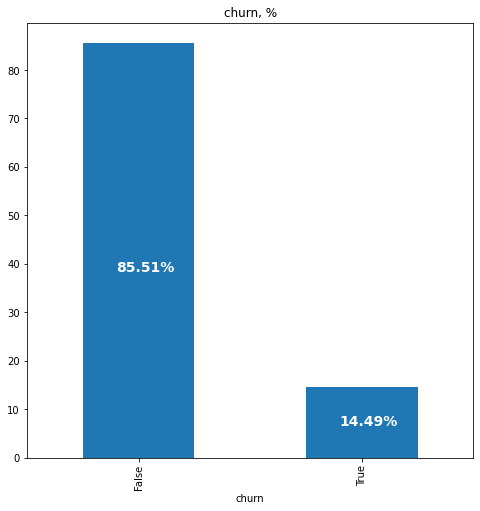

In [13]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8, 8))
churn_dist = df_churn['churn'].value_counts(normalize=True) * 100
ax = churn_dist.plot(kind='bar')
ax.set_xlabel('churn')
ax.set_title('churn, %')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    ax.annotate('{:.2f}%'.format(height), (p.get_x()+ 0.3 * width, p.get_y()+ 0.45 * height), color = 'white', weight = 'bold', size = 14)

The analysis of the churn variable reveals that 85.51% of customers do not churn, while 14.49% of customers churn from the company.

This indicates an imbalance in the distribution of the binary classes. To address this issue and prevent the model from making false predictions, we will need to apply class imbalance treatment techniques.

# Churn by International Plan

churn               False  True 
international plan              
no                  79.93  10.38
yes                  5.58   4.11


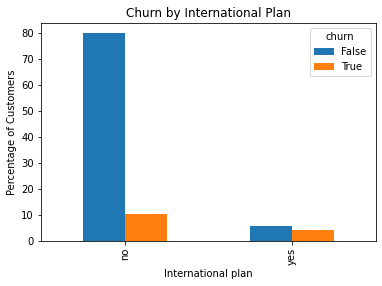

In [14]:
# Churn distribution per international_plan
international_plan_churn = pd.crosstab(df_churn['international plan'], df_churn['churn'], normalize=True)*100
print(international_plan_churn.round(2))
international_plan_churn.plot(kind='bar', xlabel='International plan', ylabel='Percentage of Customers', title='Churn by International Plan')
plt.show()

Based on the bargraph above, it is evident that customers without an international plan have a higher percentage in both the 'False' and 'True' categories compared to customers with an international plan. This suggests that having an international plan may be associated with a lower likelihood of churn.

# Churn by Voice Mail Plan

churn            False  True 
voice mail plan              
no               60.25  12.09
yes              25.26   2.40


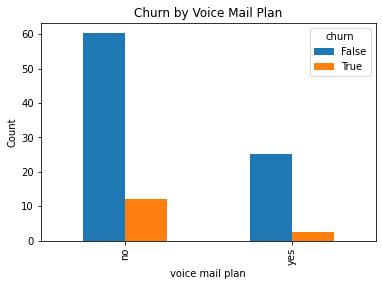

In [15]:
# Churn by Voice Mail Plan
vm_plan_churn = pd.crosstab(df_churn['voice mail plan'], df_churn['churn'], normalize=True)*100
print(vm_plan_churn.round(2))
vm_plan_churn.plot(kind='bar', xlabel='voice mail plan', ylabel='Count', title='Churn by Voice Mail Plan')
plt.show()

From the graph above, it can be observed that the majority of customers who do not have a voice mail plan are in the 'False' category, while a smaller proportion is in the 'True' category. In addition, customers with a voice mail plan have a higher count in the 'False' category compared to the 'True' category. This may suggest that having a voice mail plan may have some influence on reducing churn,

# Distribution of numeric variables

 It helps us understand the range, variability, and shape of the variables. Analyzing the distribution can aid in identifying outliers, skewness, or patterns in the data.

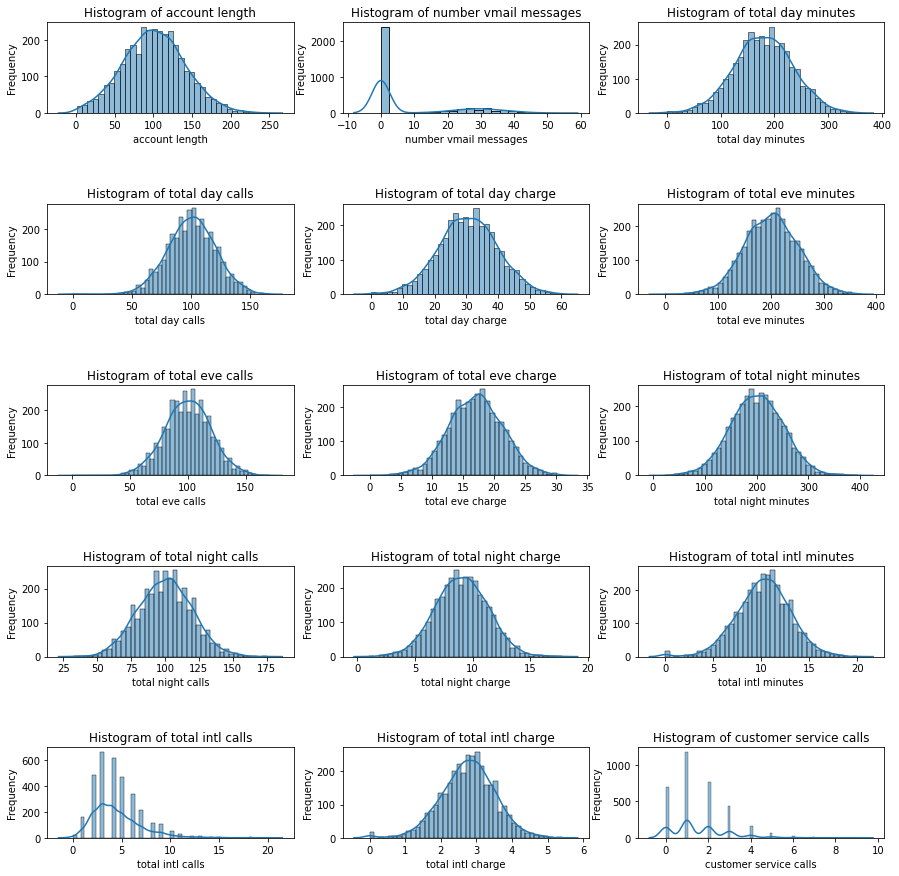

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(5, 3, figsize=(15, 15))
rows = [0, 1, 2, 3, 4, 5]
columns = [0, 1, 2]

numeric_columns_copy = numeric_columns
for i, column in enumerate(numeric_columns_copy.columns):
    row = i // 3
    col = i % 3
    
    sns.histplot(numeric_columns_copy[column], ax=ax[row][col],kde=True, kde_kws=dict(cut=3))
    ax[row][col].set_title(f"Histogram of {column}")
    ax[row][col].set_xlabel(column)
    ax[row][col].set_ylabel("Frequency")

plt.subplots_adjust(hspace=1)  # Adjust vertical spacing between rows
plt.show()

The numerical variables exhibit diverse distributions and ranges, indicating variations in customer behavior and call patterns. While some variables follow approximately normal distributions, others display skewed distributions. This suggests that the variables may require different handling approaches based on their distributions for further analysis and modeling.

# checking for outliers


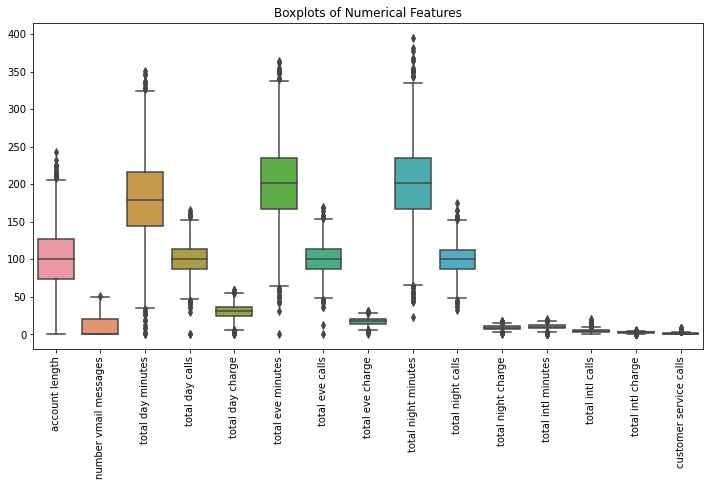

In [17]:
# Detecting outliers for numerical features using boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_churn.select_dtypes(include='number'))
plt.title("Boxplots of Numerical Features")
plt.xticks  (rotation = 90)
plt.show()

In [18]:
def remove_outliers(df_churn, columns):
    for col in columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df_churn[col].quantile(0.25)
        Q3 = df_churn[col].quantile(0.75)
        IQR = Q3 - Q1  # Interquartile Range

        # Define lower and upper bounds for detecting outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter out outliers
        df_churn = df_churn[(df_churn[col] >= lower_bound) & (df_churn[col] <= upper_bound)]
    
    return df_churn

# List of columns to check for outliers (excluding 'Churn')
feature_columns = [col for col in df_churn.columns if col != 'Churn' and df_churn[col].dtype in [np.int64, np.float64]]

# Apply the function to remove outliers
df_churn = remove_outliers(df_churn, feature_columns)
df_churn

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
4,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,118,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,68,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,28,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,184,yes,no,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


# Correlation Matrix

The correlation matrix reveals the relationships between variables, indicating how they are associated with each other.

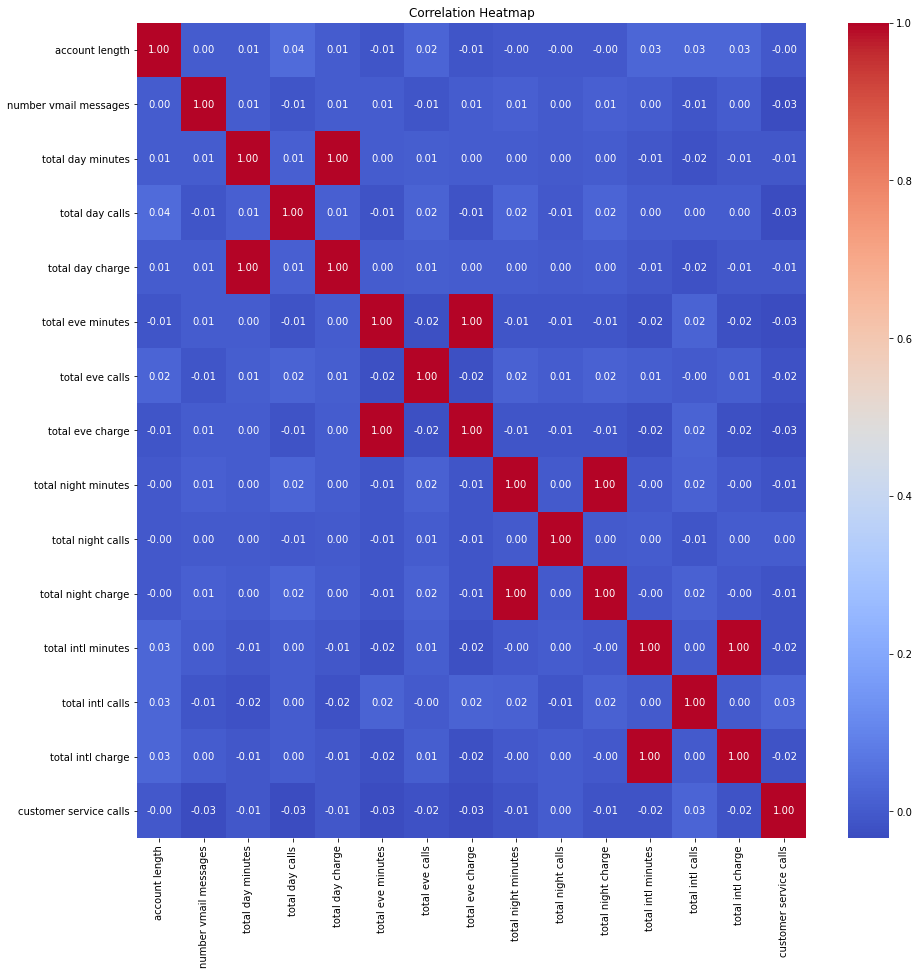

In [19]:
numeric_columns = df_churn.select_dtypes(include=['number']).columns

plt.figure(figsize=(15, 15))
sns.heatmap(df_churn[numeric_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

From the above correlation matrix, we can observe that most of the variables are not strongly correlated. However, there are some variables that exhibit a perfect correlation. This makes sense since some variables are directly correlated. 

In [20]:
import numpy as np
import pandas as pd

# Calculate the correlation matrix
corr_matrix = df_churn.corr().abs()

# Identify upper triangle of the correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find columns with correlation > 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

# Drop the columns
df_churn = df_churn.drop(columns=to_drop)

print("Dropped columns:", to_drop)

Dropped columns: ['total day charge', 'total eve charge', 'total night charge', 'total intl charge']


we identify highly correlated columns with a correlation greater than 0.9, which are considered highly redundant, and drop them from the dataset. The goal is to reduce multicollinearity and simplify the dataset by removing highly correlated features that may not provide additional useful information for modeling.

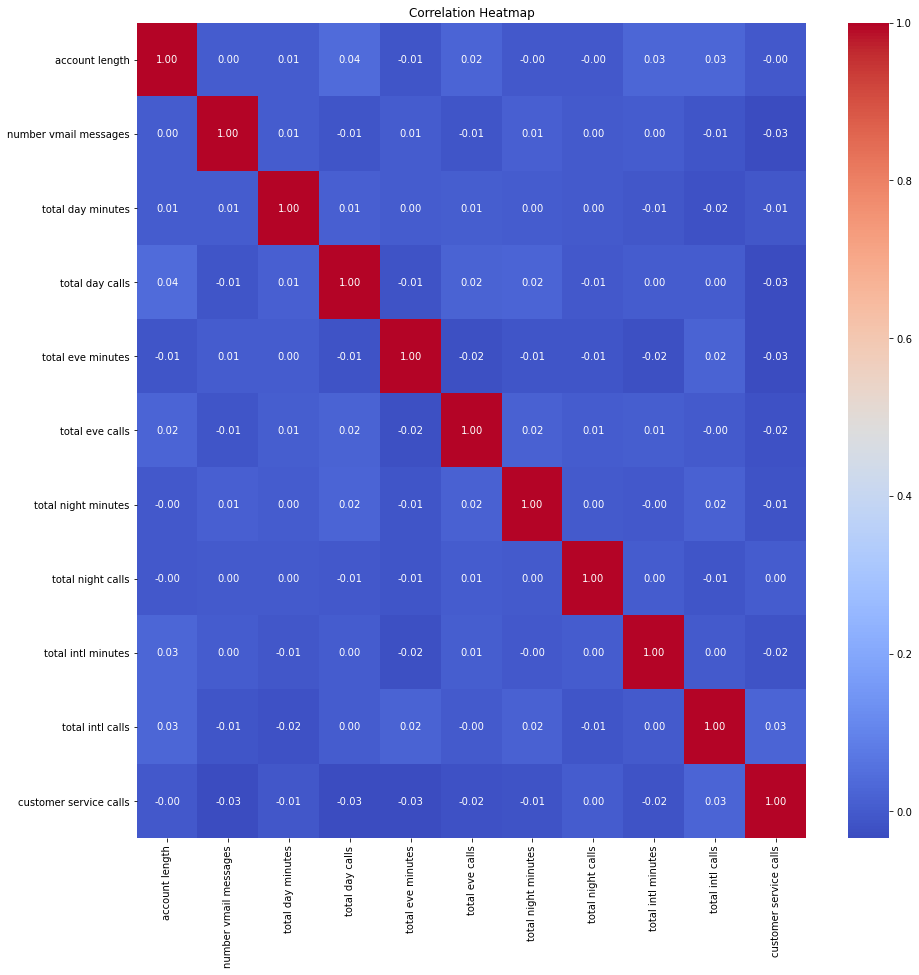

In [21]:
# Correlation heatmap for the numerical columns
numeric_columns = df_churn.select_dtypes(include=['number']).columns

plt.figure(figsize=(15, 15))
sns.heatmap(df_churn[numeric_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

# Addressing Multicollinearity

In [22]:
print("The original dataframe has {} columns.".format(df_churn.shape[1]))
# Calculate the correlation matrix and take the absolute value
# Filter numeric columns manually before calculating correlation
numeric_df = df_churn.select_dtypes(include='number')
corr_matrix = numeric_df.corr().abs()


# Create a True/False mask and apply it
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
tri_df = corr_matrix.mask(mask)

# List column names of highly correlated features (r > 0.90)
to_drop = [c for c in tri_df.columns if any(tri_df[c] >  0.90)]

df_churn = df_churn.drop(to_drop, axis=1) # Drop the features
print("The reduced dataframe has {} columns.".format(df_churn.shape[1]))

The original dataframe has 14 columns.
The reduced dataframe has 14 columns.


No high multicollinearity was detected — based on your threshold (often a correlation > 0.9 or 0.95).

This means none of the features were strongly correlated enough with each other to justify dropping one.

# label encoding

Transforming churn values into 0s and 1s so the data is compatible with the models enabling them to perform calculations and predictions. Many algorithms, especially classification models (e.g., logistic regression, decision trees, and random forests), require numeric inputs for target variables.

In [23]:
# transforming churn values into 0s and 1s
df_churn['churn'].value_counts()
df_churn['churn'] = df_churn['churn'].map({True: 1, False: 0}).astype('int') 
df_churn.head(20)

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls,churn
0,128,no,yes,25,265.1,110,197.4,99,244.7,91,10.0,3,1,0
1,107,no,yes,26,161.6,123,195.5,103,254.4,103,13.7,3,1,0
2,137,no,no,0,243.4,114,121.2,110,162.6,104,12.2,5,0,0
4,75,yes,no,0,166.7,113,148.3,122,186.9,121,10.1,3,3,0
5,118,yes,no,0,223.4,98,220.6,101,203.9,118,6.3,6,0,0
7,147,yes,no,0,157.0,79,103.1,94,211.8,96,7.1,6,0,0
9,141,yes,yes,37,258.6,84,222.0,111,326.4,97,11.2,5,0,0
11,74,no,no,0,187.7,127,163.4,148,196.0,94,9.1,5,0,0
12,168,no,no,0,128.8,96,104.9,71,141.1,128,11.2,2,1,0
13,95,no,no,0,156.6,88,247.6,75,192.3,115,12.3,5,3,0


# one hot encoding

 we convert the categorical values "yes" and "no" in the 'international plan' and 'voice mail plan' columns into numerical representations (1 for "yes" and 0 for "no"). This transformation makes the data suitable for machine learning algorithms, which typically require numerical inputs. By applying this mapping, the code prepares these categorical features for modeling while maintaining the information they represent.

In [24]:
# Map 'yes' to 1 and 'no' to 0 in the 'international plan' and 'voice mail' columns
df_churn['international plan'] = df_churn['international plan'].map({'yes': 1, 'no': 0})
df_churn['voice mail plan'] = df_churn['voice mail plan'].map({'yes': 1, 'no': 0})

# Display the first few rows of the updated DataFrame
df_churn.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls,churn
0,128,0,1,25,265.1,110,197.4,99,244.7,91,10.0,3,1,0
1,107,0,1,26,161.6,123,195.5,103,254.4,103,13.7,3,1,0
2,137,0,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0,0
4,75,1,0,0,166.7,113,148.3,122,186.9,121,10.1,3,3,0
5,118,1,0,0,223.4,98,220.6,101,203.9,118,6.3,6,0,0


# Modelling

In the modeling step, we will train and evaluate different machine learning models on our dataset to make predictions for the target variable. This involves selecting appropriate algorithms, tuning their parameters, and assessing their performance using various evaluation metrics. The goal is to find the model that best captures the patterns and relationships in the data and provides accurate predictions.

# Model 1. Logistic Regression

In [25]:
# In order to standardise the range of features to ensure they all contribute equally to the model's performance we will perform scaling
from sklearn.preprocessing import MinMaxScaler # to scale the numeric features
transformer = MinMaxScaler()

def scaling(columns):
    return transformer.fit_transform(df_churn[columns].values.reshape(-1,1))

for i in df_churn.select_dtypes(include=[np.number]).columns:
    df_churn[i] = scaling(i)
df_churn.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls,churn
0,0.622549,0.0,1.0,0.50,0.798455,0.600000,0.486667,0.481132,0.665428,0.413462,0.474820,0.222222,0.333333,0.0
1,0.519608,0.0,1.0,0.52,0.435042,0.723810,0.479630,0.518868,0.701487,0.528846,0.741007,0.222222,0.333333,0.0
2,0.666667,0.0,0.0,0.00,0.722261,0.638095,0.204444,0.584906,0.360223,0.538462,0.633094,0.444444,0.000000,0.0
4,0.362745,1.0,0.0,0.00,0.452949,0.628571,0.304815,0.698113,0.450558,0.701923,0.482014,0.222222,1.000000,0.0
5,0.573529,1.0,0.0,0.00,0.652037,0.485714,0.572593,0.500000,0.513755,0.673077,0.208633,0.555556,0.000000,0.0


In [26]:
from sklearn.model_selection import train_test_split

# Define target and features
y = df_churn['churn']
X = df_churn.drop(['churn'], axis=1)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Show class balance
print("Training set class distribution:\n", y_train.value_counts(), '\n')
print("Test set class distribution:\n", y_test.value_counts())


Training set class distribution:
 0.0    1883
1.0     214
Name: churn, dtype: int64 

Test set class distribution:
 0.0    610
1.0     90
Name: churn, dtype: int64


This gives an overview of how the target variable (churn) is distributed across both training and test sets, showing how balanced or imbalanced the data is for each class (e.g., the number of churn vs. non-churn instances). It can also be a guidance as to whether further techniques like class balancing are needed.

In [27]:
# importing the necessary libraries
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(fit_intercept=False, C=1e16, solver='liblinear')
logreg.fit(X_train, y_train)

LogisticRegression(C=1e+16, fit_intercept=False, solver='liblinear')

Here we get the trained logistic regression model that has been fitted to the training data. The model will learn the relationship between the features (X_train) and the target (y_train), with no regularization applied due to the very high value of C.

In [28]:
# Importing the relevant function and  defining y_pred

from sklearn.metrics import mean_squared_error

# Generate predictions using baseline_model and X_train
y_pred = logreg.predict(X_test)

**************** LOGISTIC REGRESSION CLASSIFIER MODEL RESULTS ****************
              precision    recall  f1-score   support

    No Churn       0.88      0.99      0.93       610
       Churn       0.53      0.09      0.15        90

    accuracy                           0.87       700
   macro avg       0.71      0.54      0.54       700
weighted avg       0.84      0.87      0.83       700



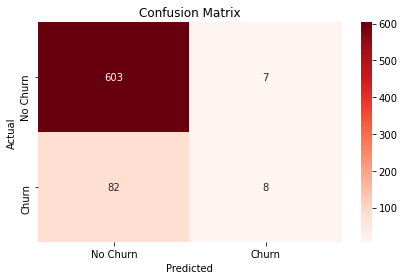

In [29]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Print classification metrics
print("**************** LOGISTIC REGRESSION CLASSIFIER MODEL RESULTS ****************")
print(classification_report(y_test, y_pred, target_names=['No Churn', 'Churn']))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

Class: No Churn
    
1.Precision (0.88):
88% of the customers predicted as No Churn were actually No Churn.

2.Recall (0.99):
The model correctly identified 99% of actual No Churn customers.

3.F1-score (0.93):
This is a harmonic mean of precision and recall — and shows very strong performance on this class.



Class: Churn
    
1.Precision (0.53):
Only 53% of the predicted churns were correct.

2.Recall (0.09):
Only 9% of actual churns were correctly identified. This is very low.

3.F1-score (0.15):
The model is doing poorly on this class — it's barely catching churners.

Overall Accuracy: 87%
        
Sounds good, but very misleading due to class imbalance.

The model is biased toward predicting "No Churn" because the majority of customers don’t churn.

The confusion matrix indicates the performance of the model as follows:

1.True Negatives (No Churn correctly predicted): 603 instances were correctly classified as "No Churn."
    
2.False Positives (Predicted Churn but was No Churn): 7 instances were incorrectly classified as "Churn" when they were actually "No Churn."
    
3.False Negatives (Predicted No Churn but was Churn): 82 instances were incorrectly classified as "No Churn" when they were actually "Churn."
    
4.True Positives (Churn correctly predicted): 8 instances were correctly classified as "Churn."
    
Overall, the model performs well for identifying "No Churn" instances but struggles significantly with identifying "Churn," as evidenced by the high number of false negatives. This suggests a potential imbalance in the dataset or room for improvement in model sensitivity towards the "Churn" class.


In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate and print key metrics
print("**************** LOGISTIC REGRESSION CLASSIFIER MODEL RESULTS ****************")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.5f}")
print(f"Precision: {precision_score(y_test, y_pred):.5f}")
print(f"Recall: {recall_score(y_test, y_pred):.5f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.5f}")

**************** LOGISTIC REGRESSION CLASSIFIER MODEL RESULTS ****************
Accuracy: 0.87286
Precision: 0.53333
Recall: 0.08889
F1 Score: 0.15238


The Logistics Regressionmodel performance metrics are as follows:

Accuracy (0.87286): The model accurately predicted 87% of all instances. Precision (0.5333): Of the cases predicted as "Churn," 53% were correct. Recall (0.08889): The model successfully identified only 8% of the actual "Churn" cases. F1 Score (0.15238): The low F1 score reflects poor overall performance in detecting "Churn," balancing both precision and recall.
                

These metrics are particularly useful for imbalanced datasets, as Accuracy alone may not reflect the model's ability to correctly identify the minority class ("Churn"). In this case, the metrics will highlight that while the model performs well in predicting "No Churn," it has lower Recall and F1 Score for "Churn," indicating room for improvement in recognizing this minority class.


# Applying SMOTE Technique to Resolve Unbalanced 'churn' Feature

In [31]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd

# Step 1: Encode categorical variables
X = pd.get_dummies(df_churn.drop("churn", axis=1), drop_first=True)
y = df_churn["churn"]

# Step 2: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Step 3: Apply SMOTE to training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Step 4: Fit logistic regression
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train_resampled, y_train_resampled)

# Step 5: Predict and evaluate
y_pred = logreg.predict(X_test)
print(classification_report(y_test, y_pred, target_names=["No Churn", "Churn"]))


              precision    recall  f1-score   support

    No Churn       0.97      0.79      0.88       624
       Churn       0.33      0.83      0.47        76

    accuracy                           0.80       700
   macro avg       0.65      0.81      0.67       700
weighted avg       0.90      0.80      0.83       700



Class: No Churn
    
1.Precision (0.97):
    
Out of all customers predicted as not churning, 97% actually didn’t churn.
 Excellent precision.

2.Recall (0.79):
    
Out of all real non-churners, 79% were correctly identified.
 A few were wrongly predicted as churners, but still strong.

3.F1-score (0.88):
    
A solid balance between precision and recall.

 Class: Churn (Minority Class)
        
1.Precision (0.33):
    
Only 33% of predicted churners were actually churners.
The model is still making some false positives.

2.Recall (0.83):
    
This is excellent! The model now detects 83% of real churners, compared to only 9% before SMOTE.
Huge improvement in catching churn!

3.F1-score (0.47):
    
Still modest, but better than before.

 Tells you there's room to improve precision, but recall is strong.


Confusion Matrix:
 [[496 128]
 [ 13  63]]


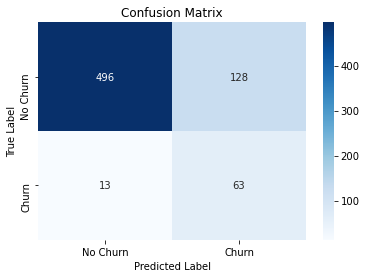

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

# Optional: Plot the confusion matrix using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


The confusion matrix indicates the performance of the model as follows:

1.True Negatives (No Churn correctly predicted): 496 instances were correctly classified as "No Churn."
    
2.False Positives (Predicted Churn but was No Churn): 128 instances were incorrectly classified as "Churn" when they were actually "No Churn."
    
3.False Negatives (Predicted No Churn but was Churn): 13 instances were incorrectly classified as "No Churn" when they were actually "Churn."
    
4.True Positives (Churn correctly predicted): 63 instances were correctly classified as "Churn."

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate and print key metrics
print("**************** LOGISTIC REGRESSION CLASSIFIER MODEL RESULTS ****************")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.5f}")
print(f"Precision: {precision_score(y_test, y_pred):.5f}")
print(f"Recall: {recall_score(y_test, y_pred):.5f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.5f}")

**************** LOGISTIC REGRESSION CLASSIFIER MODEL RESULTS ****************
Accuracy: 0.79857
Precision: 0.32984
Recall: 0.82895
F1 Score: 0.47191


The Logistics Regression model performance metrics are as follows:

Accuracy (0.79857): The model accurately predicted 79.86% of all instances. Precision (0.32984): Of the cases predicted as "Churn," 32.98% were correct. Recall (0.82895): The model successfully identified only 82.90% of the actual "Churn" cases. F1 Score (0.47191): 
                
                
Accuracy	 80% of all predictions are correct — but this can be misleading with imbalanced classes.

Precision	33% of customers predicted as churners actually churned (many false positives).

Recall	 83% of actual churners were correctly identified — very good recall.

F1 Score	0.47 — a balance between precision and recall; still moderate overall performance.




# Model2: A decision tree model

This classifier is predicting whether a customer will Churn or Not Churn.

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'max_depth': [5],
    'min_samples_split': [ 10],
    'min_samples_leaf': [5],
    'criterion': ['gini', 'entropy']
}

# Initialize model
tree = DecisionTreeClassifier(random_state=42)

# Grid search with cross-validation
grid_search = GridSearchCV(tree, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train_resampled, y_train_resampled)

# Best model
best_tree = grid_search.best_estimator_

# Evaluate
y_pred = best_tree.predict(X_test)
print("Best Parameters:", grid_search.best_params_)
print(classification_report(y_test, y_pred, target_names=["No Churn", "Churn"]))


Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 10}
              precision    recall  f1-score   support

    No Churn       0.97      0.88      0.92       624
       Churn       0.43      0.75      0.54        76

    accuracy                           0.86       700
   macro avg       0.70      0.81      0.73       700
weighted avg       0.91      0.86      0.88       700



Precision: Of the predicted class instances, how many were correct.

For Churn, 43% of the predicted churns were actual churns.

Recall: Of the actual class instances, how many were captured.

For Churn, the model caught 75% of actual churn cases.

F1-score: Harmonic mean of precision and recall (balance between them).

# key insights

The model performs very well on the majority class (No Churn).

Performance on minority class (Churn) is much lower, especially in precision (many false positives).

Recall for Churn is decent (0.75), meaning it’s catching most of the true churn cases—but at the cost of misclassifying some No Churn customers.

This is a common trade-off in imbalanced classification problems.



In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# One-hot encode categorical features
X = pd.get_dummies(df_churn.drop("churn", axis=1), drop_first=True)
y = df_churn["churn"]

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [41]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the model
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train_resampled, y_train_resampled)


DecisionTreeClassifier(random_state=42)

In [42]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Predict on test data
y_pred = tree_model.predict(X_test)

# Evaluate performance
print("**************** DECISION TREE CLASSIFIER MODEL RESULTS ****************")
print("Accuracy:", round(accuracy_score(y_test, y_pred), 5))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=["No Churn", "Churn"]))


**************** DECISION TREE CLASSIFIER MODEL RESULTS ****************
Accuracy: 0.87
Confusion Matrix:
 [[554  70]
 [ 21  55]]
Classification Report:
               precision    recall  f1-score   support

    No Churn       0.96      0.89      0.92       624
       Churn       0.44      0.72      0.55        76

    accuracy                           0.87       700
   macro avg       0.70      0.81      0.74       700
weighted avg       0.91      0.87      0.88       700



No Churn:
    
Precision 0.96: 96% of predicted No Churn were correct.

Recall 0.89: 89% of actual No Churn customers were correctly identified.

F1-score 0.92: Strong overall performance.

 Churn:
        
Precision 0.44: Only 44% of predicted Churn were actually Churn. This means many false positives.

Recall 0.72: The model caught 72% of real churn cases.

F1-score 0.55: Moderate performance—better recall than precision.

 Key Takeaways
    
Your model performs very well for the majority class (No Churn).

Churn prediction still needs work:

Recall is decent (72%) → Good at finding churners.

Precision is low (44%) → Predicts too many false churners, which may be costly if actions are taken based on this.

# MODEL 3 A Random Forest Model

In [47]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split


# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Train the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_resampled, y_resampled)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate performance
print("**************** RANDOM FOREST CLASSIFIER RESULTS ****************")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.5f}")
print(f"Precision: {precision_score(y_test, y_pred):.5f}")
print(f"Recall: {recall_score(y_test, y_pred):.5f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.5f}")

**************** RANDOM FOREST CLASSIFIER RESULTS ****************
Accuracy: 0.94143
Precision: 0.72152
Recall: 0.75000
F1 Score: 0.73548


The Random Forest model which has SMOTE applied to it clearly outperforms the Logistic Regression baseline in all metrics. While Logistic Regression shows acceptable accuracy, its poor recall and F1 score highlight its inability to effectively detect "Churn." In contrast, Random Forest demonstrates strong performance across all metrics, making it a much better choice for this problem, especially if identifying "Churn" is critical.

In [48]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Define the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [50, 100, 200],            # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],          # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],          # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],            # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]                # Whether bootstrap samples are used when building trees
}

# Apply GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='f1', verbose=2, n_jobs=-1)
grid_search.fit(X_resampled, y_resampled)

# Best hyperparameters and model
best_rf = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)

# Make predictions with the best model
y_pred = best_rf.predict(X_test)

# Evaluate the tuned model
print("**************** TUNED RANDOM FOREST CLASSIFIER RESULTS ****************")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.5f}")
print(f"Precision: {precision_score(y_test, y_pred):.5f}")
print(f"Recall: {recall_score(y_test, y_pred):.5f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.5f}")

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   47.0s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  6.2min finished


Best Hyperparameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
**************** TUNED RANDOM FOREST CLASSIFIER RESULTS ****************
Accuracy: 0.94429
Precision: 0.76056
Recall: 0.71053
F1 Score: 0.73469


The tuned Random Forest model achieves excellent performance across all metrics, significantly improving the detection of "Churn" compared to earlier models like Logistic Regression. It effectively balances precision and recall, making it reliable for applications where identifying churners accurately is critical for business strategy. The chosen hyperparameters likely enhanced the model's ability to generalize and capture the complexities of the data.

Hyperparameter tuning marginally improved overall performance, with a higher accuracy, precision, and F1 score compared to the baseline. While recall slightly decreased, the improvement in precision ensures that the tuned model is more reliable and consistent in its predictions. This makes the tuned Random Forest classifier a more robust choice, especially in scenarios prioritizing reduced false positives without sacrificing much recall.

                   Feature  Importance
4        total day minutes    0.258197
1       international plan    0.122312
6        total eve minutes    0.102947
11        total intl calls    0.096494
8      total night minutes    0.070882
10      total intl minutes    0.065523
0           account length    0.046948
5          total day calls    0.045414
9        total night calls    0.044830
12  customer service calls    0.044114
7          total eve calls    0.040950
3    number vmail messages    0.038998
2          voice mail plan    0.022390


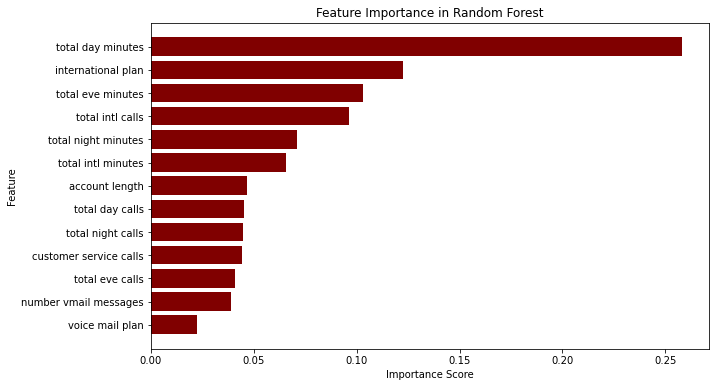

In [50]:
import pandas as pd
import matplotlib.pyplot as plt


# Get feature importances
feature_importances = best_rf.feature_importances_

# Create a DataFrame to visualize
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display feature importances
print(feature_importance_df)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='maroon')
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance in Random Forest")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()


The feature importance scores indicate how much each feature contributes to the Random Forest model's predictions. Here's an explanation of the results:


   # Top Contributors:


total day minutes (0.265): This feature has the highest importance, meaning the total minutes a customer spends on daytime calls is the most critical factor in predicting churn.
international plan (0.150): Whether a customer has subscribed to an international plan is the second most influential factor, reflecting its impact on churn decisions.
total intl calls (0.101): The total number of international calls made is another significant factor, showing its relevance in customer churn behavior.

   # Less Significant Features:

Call and account-related features like total day calls (0.048), account length (0.047), and total eve calls (0.043) have lower importance, suggesting they are less predictive of churn compared to the top features.
customer service calls (0.035): While low, this feature still has some influence, as frequent interactions with customer service might be a signal of dissatisfaction.
voice mail plan (0.035): This feature has minimal impact, indicating it is not a major factor in predicting churn.

 # Summary:
    
The model emphasizes call usage patterns (minutes and international calls) and subscription plans (international plan) as the primary predictors of churn. Features like account length, voice mail plan, and customer service calls have relatively less influence. These insights could guide strategies for churn reduction by focusing on optimizing services related to the most critical features.

*************** MODEL COMPARISON RESULTS ***************
Training Data:
              classifiers      auc  accuracy
0      LogisticRegression  0.86147  0.904149
1  RandomForestClassifier  1.00000  1.000000
2  DecisionTreeClassifier  1.00000  1.000000

Best Model on Training Data: DecisionTreeClassifier (AUC: 1.000, Accuracy: 1.000)

Test Data:
              classifiers       auc  accuracy
0      LogisticRegression  0.864604  0.898571
1  RandomForestClassifier  0.917858  0.962857
2  DecisionTreeClassifier  0.834599  0.921429

Best Model on Test Data: RandomForestClassifier (AUC: 0.918, Accuracy: 0.963)


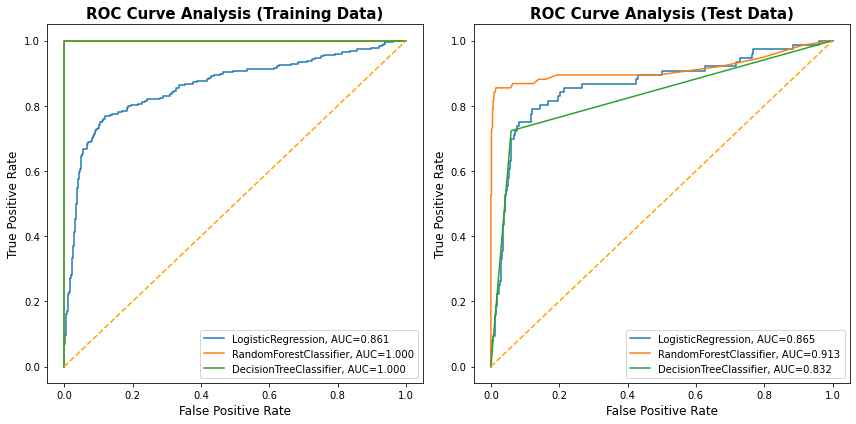

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score
import matplotlib.pyplot as plt
import pandas as pd

# Define classifiers
classifiers = [
    LogisticRegression(max_iter=1000),
    RandomForestClassifier(),
    DecisionTreeClassifier()
]

# Collect results in lists
train_results = []
test_results = []

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train, y_train)

    # Training predictions
    y_train_proba = model.predict_proba(X_train)[:, 1]
    y_train_pred = model.predict(X_train)
    train_auc = roc_auc_score(y_train, y_train_proba)
    train_accuracy = accuracy_score(y_train, y_train_pred)

    # Testing predictions
    y_test_proba = model.predict_proba(X_test)[:, 1]
    y_test_pred = model.predict(X_test)
    test_auc = roc_auc_score(y_test, y_test_proba)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Append to results
    train_results.append({'classifiers': cls.__class__.__name__, 'auc': train_auc, 'accuracy': train_accuracy})
    test_results.append({'classifiers': cls.__class__.__name__, 'auc': test_auc, 'accuracy': test_accuracy})

# Convert to DataFrames
train_result_table = pd.DataFrame(train_results)
test_result_table = pd.DataFrame(test_results)

# Identify best model by AUC
best_train_model = train_result_table.loc[train_result_table['auc'].idxmax()]
best_test_model = test_result_table.loc[test_result_table['auc'].idxmax()]

# Display results
print("*************** MODEL COMPARISON RESULTS ***************")
print("Training Data:")
print(train_result_table)
print("\nBest Model on Training Data: {} (AUC: {:.3f}, Accuracy: {:.3f})".format(
    best_train_model['classifiers'], best_train_model['auc'], best_train_model['accuracy']))

print("\nTest Data:")
print(test_result_table)
print("\nBest Model on Test Data: {} (AUC: {:.3f}, Accuracy: {:.3f})".format(
    best_test_model['classifiers'], best_test_model['auc'], best_test_model['accuracy']))

# Plot ROC Curves
plt.figure(figsize=(12, 6))

# Training ROC
plt.subplot(1, 2, 1)
plt.title('ROC Curve Analysis (Training Data)', fontweight='bold', fontsize=15)
for cls in classifiers:
    model = cls.fit(X_train, y_train)
    y_train_proba = model.predict_proba(X_train)[:, 1]
    fpr, tpr, _ = roc_curve(y_train, y_train_proba)
    auc = roc_auc_score(y_train, y_train_proba)
    plt.plot(fpr, tpr, label="{}, AUC={:.3f}".format(cls.__class__.__name__, auc))
plt.plot([0, 1], [0, 1], color='orange', linestyle='--')
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.legend(prop={'size': 10}, loc='lower right')

# Testing ROC
plt.subplot(1, 2, 2)
plt.title('ROC Curve Analysis (Test Data)', fontweight='bold', fontsize=15)
for cls in classifiers:
    model = cls.fit(X_train, y_train)
    y_test_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_test_proba)
    auc = roc_auc_score(y_test, y_test_proba)
    plt.plot(fpr, tpr, label="{}, AUC={:.3f}".format(cls.__class__.__name__, auc))
plt.plot([0, 1], [0, 1], color='orange', linestyle='--')
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.legend(prop={'size': 10}, loc='lower right')

plt.tight_layout()
plt.show()


Of the three models (Logistic Regression, Random Forest, and Decision Tree) based on their AUC and accuracy scores for both training and test data we can conclude as follows;

Training Data Results: Random Forest and Decision Tree models have perfect accuracy and AUC scores of 1.000, suggesting they fit the training data perfectly. However, this could indicate overfitting, as these models may have memorized the training data rather than generalizing well.
Test Data Results: When evaluated on the test data, the Random Forest classifier stands out with the highest AUC (0.9179) and accuracy (96.28%). It outperforms the other two models, indicating better generalization and performance on unseen data. The Decision Tree model has a relatively high accuracy but a lower AUC, suggesting it may not handle the complexity of the data as well as Random Forest. Logistic Regression also has a lower AUC and accuracy compared to Random Forest.
Conclusion: The Random Forest classifier is the best model to use, as it achieves the highest accuracy and AUC on both training and test data, with the best generalization capability to unseen data.